In [0]:
from google.colab import files

In [0]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"saudarshad7283","key":"16046be3fc37d676ec215bcfb91ff98e"}'}

In [0]:
!pip install -q kaggle

In [0]:
!ls

'kaggle (1).json'   kaggle.json   Lipread   p   sample_data   TensorFace


In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d saudarshad7283/ndsetlr

 37% 17.0M/46.0M [00:00<00:00, 157MB/s]
100% 46.0M/46.0M [00:00<00:00, 226MB/s]


In [0]:
!kaggle datasets download -d saudarshad7283/lipread-nonprocessed

100% 920M/925M [00:04<00:00, 266MB/s]
100% 925M/925M [00:04<00:00, 232MB/s]


In [0]:
!unzip "ndsetlr.zip"

Archive:  ndsetlr.zip
replace p/test/abs/ABSOLUTELY_00001.avi? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
!ls

'kaggle (1).json'   Lipread		       ndsetlr.zip   sample_data
 kaggle.json	    lipread-nonprocessed.zip   p	     TensorFace


In [0]:
!unzip "lipread-nonprocessed.zip"

Archive:  lipread-nonprocessed.zip
replace Lipread/Test/ABSOLUTELY/ABSOLUTELY_00001.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
!ls p/train/

abs  abu  acc  accu  all  bec  bla


In [0]:
!ls Lipread/Train/

abs  abu  acc  accu  all  bec  bla


In [0]:
!pip install sklearn

In [0]:
import cv2
import sklearn as sk
import numpy as np
import os

In [0]:
!git clone https://github.com/AKSHAYUBHAT/TensorFace.git



fatal: destination path 'TensorFace' already exists and is not an empty directory.


In [0]:
!rm lipread-nonprocessed.zip
!rm ndsetlr.zip

In [0]:
!ls

'kaggle (1).json'   kaggle.json   Lipread   p   sample_data   TensorFace


In [0]:
import dlib
from imutils import face_utils

p = "TensorFace/openface/models/dlib/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

print ("predictor made")

import cv2
import sklearn as sk
import numpy as np
import os
from sklearn.model_selection import train_test_split
ndset_folder = 'p/train'
lipread_folder = 'Lipread/Train'
X_data = []
y_data = []
z_data = []
list_of_sent = os.listdir(ndset_folder)
for i in list_of_sent:
    classes_folder = str(ndset_folder + '/' + i) #path to each class
    list_of_frames = os.listdir(classes_folder)
    for filename in  sorted(list_of_frames):
        cap = cv2.VideoCapture(ndset_folder+'/'+i+'/'+filename)
        cap1 = cv2.VideoCapture(lipread_folder+'/'+i+'/'+filename.replace("avi","mp4"))
        vid = []
        dlib_ldmarks = []
        ret, fr = cap.read()
        ret1, fr1 = cap1.read()
        ret1, fr1 = cap1.read()
        while ret:
          fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY )
          if ret1:
            gray = cv2.cvtColor(fr1, cv2.COLOR_BGR2GRAY)
            rects = detector(gray, 0)
          if(len(rects)==0):
            ret1, fr1 = cap1.read()
            if ret1:
              gray = cv2.cvtColor(fr1, cv2.COLOR_BGR2GRAY)
              rects = detector(gray, 0)
          if (len(rects) != 0 ):
            shape = predictor(gray, rects[0])
            shape = face_utils.shape_to_np(shape)
            shape = shape[48:67]
            dlib_ldmarks.append(np.array(shape))
          vid.append(fr)
          ret, fr = cap.read()
          ret1, fr1 = cap1.read()
        if len(vid) != 0:
          st = np.array(dlib_ldmarks).shape
          while (st[0])!=24:
            dlib_ldmarks.append(np.zeros((19,2), np.uint8))
            st = np.array(dlib_ldmarks).shape
          z_data.append(np.array(dlib_ldmarks))
          y_data.append(i)
          X_data.append(np.array(vid).reshape(24,60,80,1))
          print (len(z_data))
          

X_data = np.array(X_data)
y_data = np.array(y_data)
z_data = np.array(z_data)
 
#Encoding Targets with OneHotEncoding
y_data = y_data.reshape(len(y_data), 1)
encoder = sk.preprocessing.OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y_data)

#Splitting in Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_encoded, test_size=0.2, shuffle=True, random_state=100 )

predictor made
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
2

In [0]:

from keras.models import Sequential, Model
from keras.layers import Conv3D, add, MaxPool3D, Input
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, concatenate
from keras.optimizers import Adam, SGD, RMSprop
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from time import time
from sklearn.preprocessing import LabelEncoder


inp = Input(shape = (24,60,80,1))
x = Conv3D(16, (2,3,3), strides = (1,1,1) , padding='same', kernel_initializer='he_normal')(inp)
x = Activation('relu')(x)
x = Conv3D(48, (2,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Conv3D(64, (3,3,3), strides = (2,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = MaxPool3D((2,3,3), strides=(1,1,1))(x)
x = Conv3D(96, (2,3,3), strides = (1,1,2) , padding='valid', kernel_initializer='he_normal')(x)
x = Conv3D(128, (2,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Flatten(name='Flatten_of_Base')(x)
base_LipReader = Model(inp, x, name="Base_LipReader")

#inp3 = Input(shape = (24,60,80,1))
z = Conv3D(16, (1,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(inp)
z = Activation('relu')(z)
z = Conv3D(48, (1,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = BatchNormalization()(z)
z = Conv3D(64, (1,4,4), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = Conv3D(96, (1,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = Conv3D(128, (4,1,1), strides = (2,1,1) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = Conv3D(160, (3,1,1), strides = (2,1,1) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = MaxPool3D(pool_size=(3,1,1), strides=(2,1,1))(z)
z = Flatten(name = 'Flatten_of_Spatio_temp')(z)
Spatio_temp = Model(inp, z, name="Spatio_temp")

inp1 = Input(shape=(24,19,2))
x1 = Flatten()(inp1)
x1 = Dense(256, kernel_initializer='he_normal')(x1)
x1 = Activation('relu')(x1)
x1 = BatchNormalization()(x1)
Dlib_features = Model(inp1, x1, name="Dlib_features")


#inp2 = Input(shape = (24,60,80,1))
y = Conv3D(16, (3,1,1), strides = (1,1,1) , padding='valid', kernel_initializer='he_normal')(inp)
y = Activation('relu')(y)
y = Conv3D(48, (3,1,1), strides = (1,1,1) , padding='valid', kernel_initializer='he_normal')(y)
y = Activation('relu')(y)
y = BatchNormalization()(y)
y = Conv3D(64, (3,1,1), strides = (2,1,1) , padding='valid', kernel_initializer='he_normal')(y)
y = Activation('relu')(y)
y = Conv3D(96, (1,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(y)
y = Conv3D(128, (1,3,4), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(y)
y = Activation('relu')(y)
y = Conv3D(192, (1,3,3), strides = (1,1,2) , padding='valid', kernel_initializer='he_normal')(y)
y = Activation('relu')(y)
y = BatchNormalization()(y)
y = MaxPool3D(pool_size=(1,3,3), strides=(1,2,2))(y)
y = Flatten(name="Flatten_of_Temp_Spatia")(y)
Temp_Spatia = Model(inp, y, name="Temp_Spatia")

combined = concatenate([base_LipReader.output,Temp_Spatia.output, Spatio_temp.output, Dlib_features.output])

out = Dense(7,  kernel_initializer='he_normal',  activation='softmax')(combined)

overall_model = Model(inputs=[base_LipReader.input, Dlib_features.input], outputs = out, name="overall_model")
overall_model.summary()

overall_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = overall_model.fit([X_data, z_data] , y = (y_encoded), batch_size=16, epochs = 50)

Model: "overall_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 24, 60, 80, 1 0                                            
__________________________________________________________________________________________________
conv3d_29 (Conv3D)              (None, 22, 60, 80, 1 64          input_3[0][0]                    
__________________________________________________________________________________________________
conv3d_23 (Conv3D)              (None, 24, 29, 39, 1 160         input_3[0][0]                    
__________________________________________________________________________________________________
activation_24 (Activation)      (None, 22, 60, 80, 1 0           conv3d_29[0][0]                  
______________________________________________________________________________________

In [0]:
from keras.models import Sequential, Model
from keras.layers import Conv3D, add, MaxPool3D, Input
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, concatenate
from keras.optimizers import Adam, SGD, RMSprop
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from time import time
from sklearn.preprocessing import LabelEncoder


inp = Input(shape = (24,60,80,1))
x = Conv3D(16, (2,3,3), strides = (1,1,1) , padding='same', kernel_initializer='he_normal')(inp)
x = Activation('relu')(x)
x = Conv3D(48, (2,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Conv3D(64, (3,3,3), strides = (2,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = MaxPool3D((2,3,3), strides=(1,1,1))(x)
x = Conv3D(96, (2,3,3), strides = (1,1,2) , padding='valid', kernel_initializer='he_normal')(x)
x = Conv3D(128, (2,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Flatten(name='Flatten_of_Base')(x)
base_LipReader = Model(inp, x, name="Base_LipReader")

#inp3 = Input(shape = (24,60,80,1))
z = Conv3D(16, (1,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(inp)
z = Activation('relu')(z)
z = Conv3D(48, (1,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = BatchNormalization()(z)
z = Conv3D(64, (1,4,4), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = Conv3D(96, (1,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = Conv3D(128, (4,1,1), strides = (2,1,1) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = Conv3D(160, (3,1,1), strides = (2,1,1) , padding='valid', kernel_initializer='he_normal')(z)
z = Activation('relu')(z)
z = MaxPool3D(pool_size=(3,1,1), strides=(2,1,1))(z)
z = Flatten(name = 'Flatten_of_Spatio_temp')(z)
Spatio_temp = Model(inp, z, name="Spatio_temp")


#inp1 = Input(shape=(24,17,))
#x1 = Flatten()(inp1)
#x1 = Dense(128, activation='relu', kernel_initializer='he_normal')(x1)
#Dlib_features = Model(inp1, x1, name="Dlib_features")


#inp2 = Input(shape = (24,60,80,1))
y = Conv3D(16, (3,1,1), strides = (1,1,1) , padding='valid', kernel_initializer='he_normal')(inp)
y = Activation('relu')(y)
y = Conv3D(48, (3,1,1), strides = (1,1,1) , padding='valid', kernel_initializer='he_normal')(y)
y = Activation('relu')(y)
y = BatchNormalization()(y)
y = Conv3D(64, (3,1,1), strides = (2,1,1) , padding='valid', kernel_initializer='he_normal')(y)
y = Activation('relu')(y)
y = Conv3D(96, (1,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(y)
y = Conv3D(128, (1,3,4), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(y)
y = Activation('relu')(y)
y = Conv3D(192, (1,3,3), strides = (1,1,2) , padding='valid', kernel_initializer='he_normal')(y)
y = Activation('relu')(y)
y = BatchNormalization()(y)
y = MaxPool3D(pool_size=(1,3,3), strides=(1,2,2))(y)
y = Flatten(name="Flatten_of_Temp_Spatia")(y)
Temp_Spatia = Model(inp, y, name="Temp_Spatia")

combined = concatenate([base_LipReader.output,Temp_Spatia.output, Spatio_temp.output])

out = Dense(7,  kernel_initializer='he_normal',  activation='softmax')(combined)

overall_model = Model(inputs=[base_LipReader.input], outputs = out, name="overall_model")
overall_model.summary()

overall_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = overall_model.fit([X_train] , y = (y_train), batch_size=16, epochs = 34, validation_data=(X_test, y_test))

Model: "overall_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           (None, 24, 60, 80, 1 0                                            
__________________________________________________________________________________________________
conv3d_522 (Conv3D)             (None, 22, 60, 80, 1 64          input_31[0][0]                   
__________________________________________________________________________________________________
conv3d_516 (Conv3D)             (None, 24, 29, 39, 1 160         input_31[0][0]                   
__________________________________________________________________________________________________
activation_381 (Activation)     (None, 22, 60, 80, 1 0           conv3d_522[0][0]                 
______________________________________________________________________________________

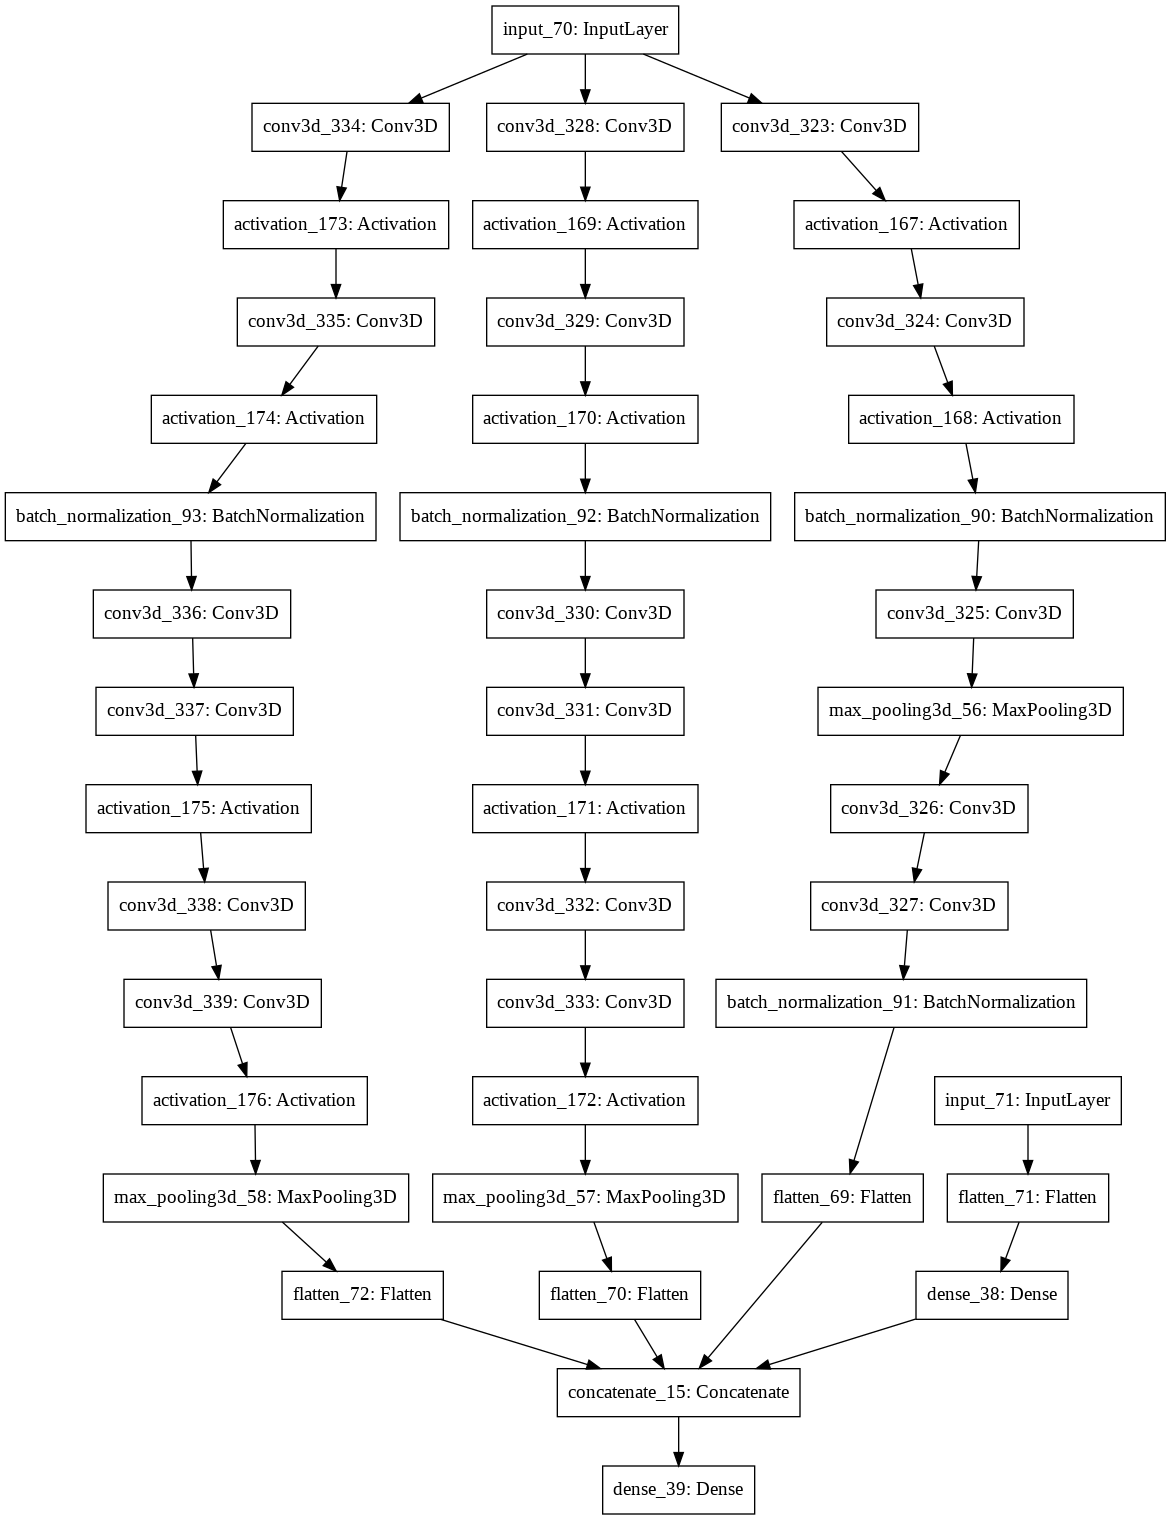

In [0]:
from keras.utils import plot_model
plot_model(overall_model, to_file='model.png')

In [0]:
from keras.models import Sequential, Model
from keras.layers import Conv3D, add, MaxPool3D, Input
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, concatenate
from keras.optimizers import Adam, SGD, RMSprop
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from time import time
from sklearn.preprocessing import LabelEncoder


inp = Input(shape = (24,60,80,1))
x = Conv3D(16, (2,3,3), strides = (1,1,1) , padding='same', kernel_initializer='he_normal')(inp)
x = Activation('relu')(x)
x = Conv3D(48, (2,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Conv3D(64, (3,3,3), strides = (2,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = MaxPool3D((2,3,3), strides=(1,1,1))(x)
x = Conv3D(96, (2,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = Conv3D(128, (2,3,3), strides = (1,2,2) , padding='valid', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(7,  kernel_initializer='he_normal',  activation='softmax')(x)
base_LipReader = Model(inp, x, name="Base_LipReader")
base_LipReader.summary()

base_LipReader.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = base_LipReader.fit(X_train, y_train, batch_size=16, epochs = 34, validation_data=(X_test, y_test))

Model: "Base_LipReader"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 24, 60, 80, 1)     0         
_________________________________________________________________
conv3d_70 (Conv3D)           (None, 24, 60, 80, 16)    304       
_________________________________________________________________
activation_29 (Activation)   (None, 24, 60, 80, 16)    0         
_________________________________________________________________
conv3d_71 (Conv3D)           (None, 23, 29, 39, 48)    13872     
_________________________________________________________________
activation_30 (Activation)   (None, 23, 29, 39, 48)    0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 23, 29, 39, 48)    192       
_________________________________________________________________
conv3d_72 (Conv3D)           (None, 11, 14, 19, 64) 

In [0]:
history = base_LipReader.fit(X_train, y_train, batch_size=16, epochs = 4, validation_data=(X_test, y_test))

Train on 5439 samples, validate on 1360 samples
Epoch 1/4
5439/5439 [==============================] - 24s 4ms/step - loss: 0.0565 - acc: 0.9844 - val_loss: 0.8807 - val_acc: 0.8809
Epoch 2/4
5439/5439 [==============================] - 24s 4ms/step - loss: 0.0431 - acc: 0.9903 - val_loss: 0.6892 - val_acc: 0.8912
Epoch 3/4
5439/5439 [==============================] - 24s 5ms/step - loss: 0.0227 - acc: 0.9943 - val_loss: 0.7257 - val_acc: 0.9044
Epoch 4/4
5439/5439 [==============================] - 24s 4ms/step - loss: 0.0161 - acc: 0.9956 - val_loss: 0.6476 - val_acc: 0.9022
